In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Importing Dataset

In [17]:
dataset = pd.read_csv('./USA_Housing.csv')
# dataset.info()
# dataset.isnull().sum()
dataset.head()

Y = dataset.drop(columns=['Avg. Area Number of Bedrooms','Avg. Area Number of Rooms','Avg. Area House Age','Avg. Area Income'],axis='columns')
Y



,Area Population,Price
0,23086.80050,1.059034e+06
1,40173.07217,1.505891e+06
2,36882.15940,1.058988e+06
3,34310.24283,1.260617e+06
4,26354.10947,6.309435e+05
...,...,...
4995,22837.36103,1.060194e+06
4996,25616.11549,1.482618e+06
4997,33266.14549,1.030730e+06
4998,42625.62016,1.198657e+06


Visualize the data points

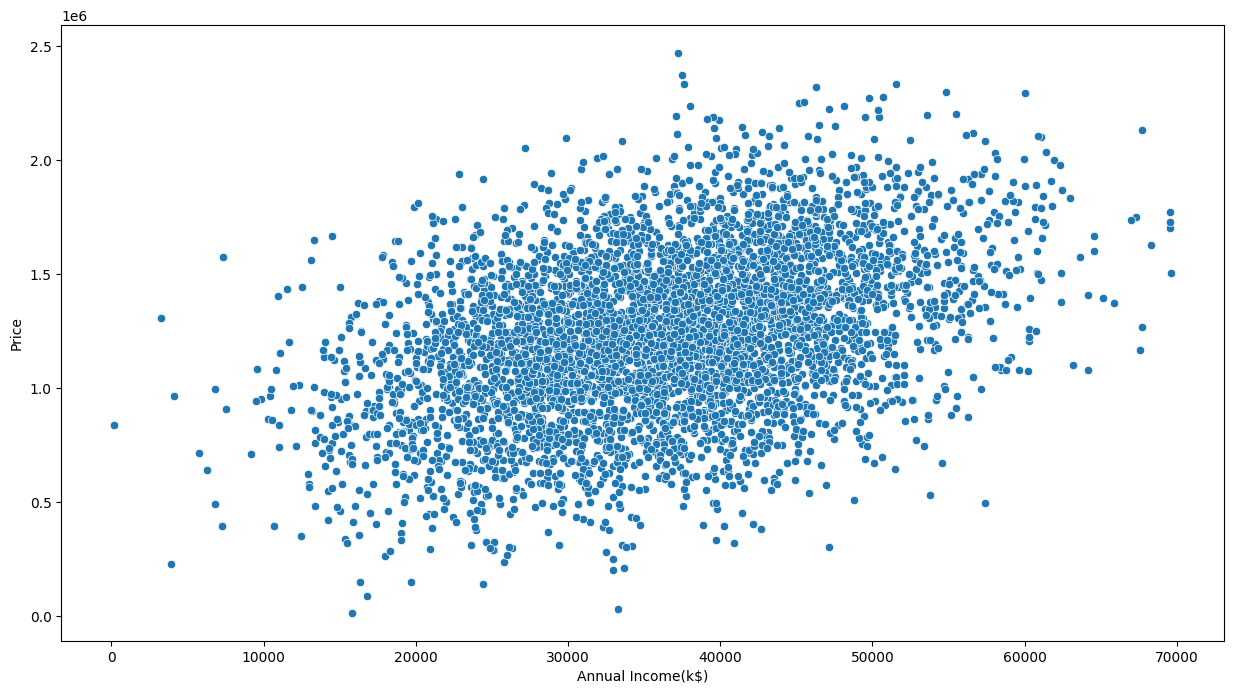

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=Y,x='Area Population',y='Price')
plt.xlabel("Annual Income(k$)")
plt.ylabel("Price")
plt.show()

Finding the K value using the Elbow Method

c:\Users\mukul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mukul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mukul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mukul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

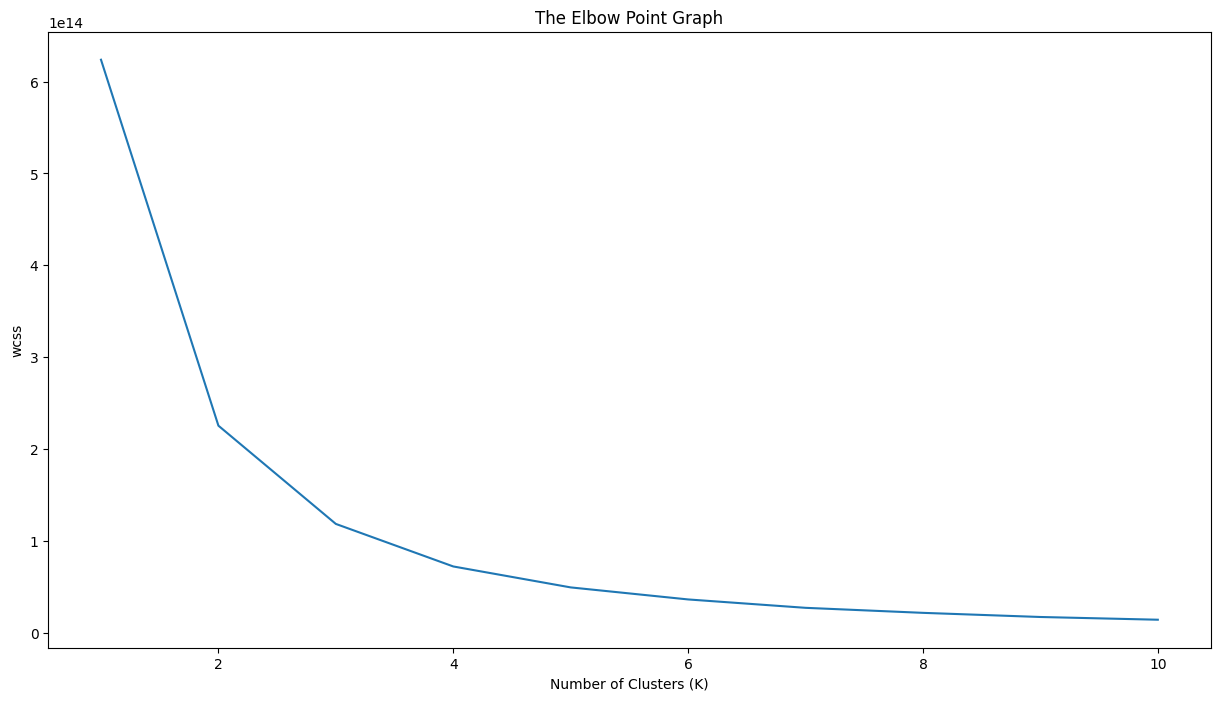

In [20]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.show()

Training the K-means algorithm on the training dataset

In [21]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
model = kmeans.fit_predict(Y)

c:\Users\mukul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
kmeans.cluster_centers_

array([[  39127.89912226, 1486249.69254358],
       [  35799.79306011, 1217641.1689067 ],
       [  32863.80449343,  961129.12419375],
       [  43378.2558542 , 1829992.67243993],
       [  29672.13397579,  628891.33948592]])

In [33]:
print(np.unique(model))

[0 1 2 3 4]


In [39]:
print(Y['Area Population'][0])

23086.8005


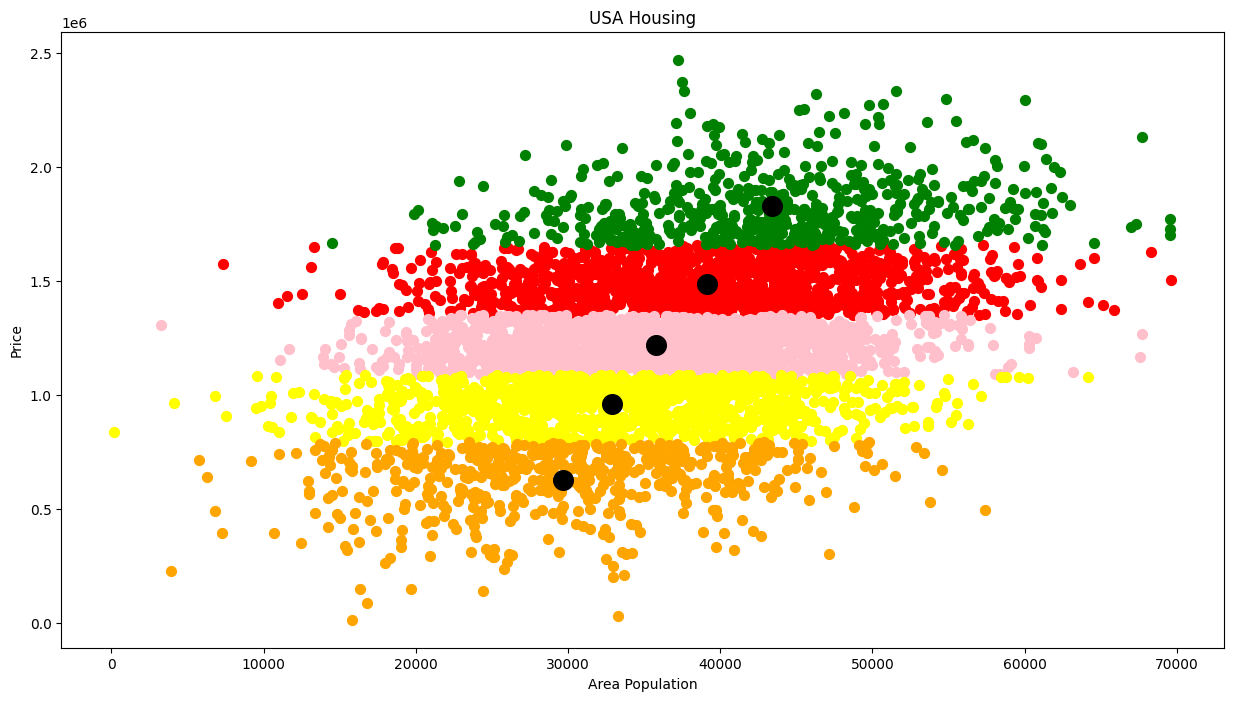

In [41]:
plt.figure(figsize=(15,8))
plt.scatter(Y['Area Population'][model==0], Y['Price'][model==0], s=50, c='red', label='Cluster 1')
plt.scatter(Y['Area Population'][model==1], Y['Price'][model==1], s=50, c='pink', label='Cluster 2')
plt.scatter(Y['Area Population'][model==2], Y['Price'][model==2], s=50, c='yellow', label='Cluster 3')
plt.scatter(Y['Area Population'][model==3], Y['Price'][model==3], s=50, c='green', label='Cluster 4')
plt.scatter(Y['Area Population'][model==4], Y['Price'][model==4], s=50, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='Centroids')
plt.title('USA Housing')
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.show()